Challenge 1.2 - Runge-Kutta

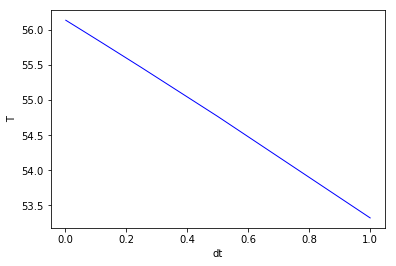

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate

def f(y):
    return -r*(y-Ts)

def rk4(y,dx):
    k1 = dx*f(y)
    k2 = dx*f(y+k1/2.)
    k3 = dx*f(y+k2/2.)
    k4 = dx*f(y+k3)
    return y + (1./6.)*(k1+2.*k2+2.*k3+k4)

dt = 1.
tmax = 10.
temp_test = np.zeros(10)
dt_test = np.zeros(10)
dt_test[0] = dt
for i in range(0,10):
    nsteps = int(tmax/dt)
    my_time = np.linspace(dt,tmax,nsteps)
    my_temp = np.zeros(nsteps)
    my_temp[0] = T0
    T = T0
    for j in range(1,nsteps):
        T = rk4(T,dt)
        my_temp[j] = T
    dt_test[i] = dt
    temp_test[i] = my_temp[-1]
    dt = dt/2

plt.plot(dt_test, temp_test, 'b', ls='-', lw = 1)
plt.xlabel('dt')
plt.ylabel('T')

Exercise 1.5 - Varying gravitational force (no drag)

In [2]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt

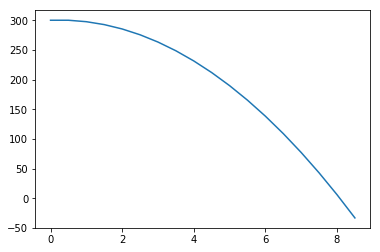

In [20]:
g = 9.8            # g acceleration
R_E = 6.37*10**6   # Radius of Earth
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity

dt = 0.5           # time step

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]
g_dat = [g/(1+p.y/R_E)**2]

while p.y > 0.:
    fy = -g*mass/(1+p.y/R_E)**2
    g_dat.append(g/(1+p.y/R_E)**2)
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)
g_data = np.array(g_dat)

plt.plot(t_data,y_data)

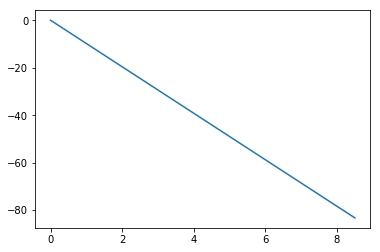

In [10]:
plt.plot(t_data,v_data)

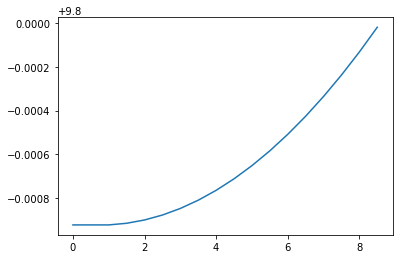

In [21]:
plt.plot(t_data, g_data)